# House Prices: Advanced Regression Techniques

This notebook contain a solution to [kaggle House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/) of predicting house prices based on 80 features. Train data set has 1460 houses and test data set has 1459 houses.

### Contents:
1. Import Libraries
2. Read and Explore Data
3. Data Analysis and Visualization
4. Clean and arrange data
5. Fitting and comparing Models
6. Validatin Model
7. Creating Submission File

## 1. Import Libraries

Import numpy, pandas and plotting libraries (matplotlib and seaborn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read and Explore Data

Load data from csv and make initial exploration of train and test DataFrames (check what data it has, what is the 
type of the data, percentage of missing values and initial description of the data. 

In order to make the importation the data have to be downloaded from Kaggle ([kaggle titanic data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)) extracted and saved as 'data/house-prices_train.csv' and 'data/house-prices_test.csv'. 

In [2]:
# load train and test data sets
dfTrain = pd.read_csv('data/house-prices_train.csv', index_col='Id')
dfTest = pd.read_csv('data/house-prices_test.csv', index_col='Id')

In [3]:
# print dfTrain and dfTest shape and info about dfTrain columns
print("Shape of train and test DataFrames:", dfTrain.shape, dfTest.shape)
dfTrain.info()

Shape of train and test DataFrames: (1460, 80) (1459, 79)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exteri

In [4]:
# print description of train data set numeric features
dfTrain.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# lists with kind of the column data
numeric = list(dfTrain.select_dtypes(include=['int64', 'float64']).columns.values)
integer = list(dfTrain.select_dtypes(include=['int64']).columns.values)
real = list(dfTrain.select_dtypes(include=['float64']).columns.values)
string = list(dfTrain.select_dtypes(include=['object']).columns.values)

print("Numeric features:", len(numeric))
print("Numeric integer features:", len(integer))
print("Numeric real features:", len(real))
print("String features:", len(string))

Numeric features: 37
Numeric integer features: 34
Numeric real features: 3
String features: 43


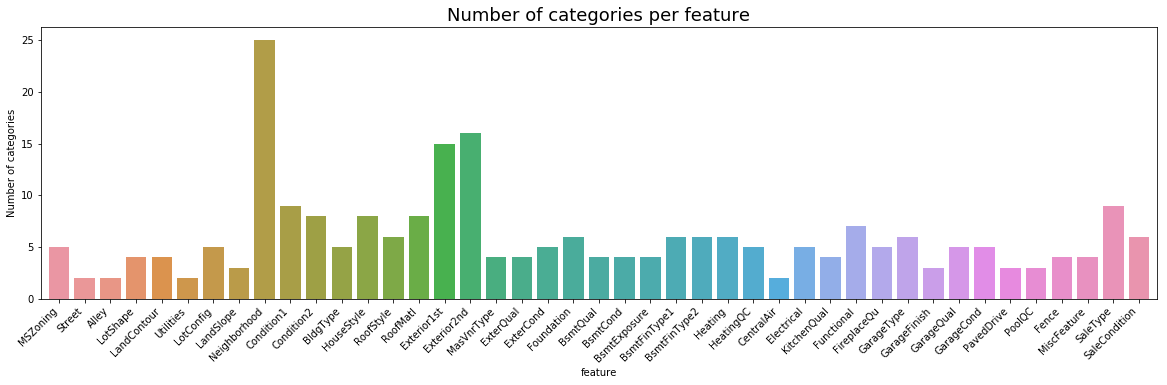

In [6]:
# plot number of categories per string feature
nu = dfTrain[string].nunique().reset_index()
nu.columns = ['feature','nunique']
plt.figure(figsize=(20,5))
sns.barplot(x='feature', y='nunique', data=nu)
size = len(string)
plt.xticks(np.linspace(0,size+1,size+2), dfTrain[string].columns.values, rotation=45, ha="right")
plt.xlim(-0.7,size-0.3)
plt.title("Number of categories per feature", fontsize=18)
plt.ylabel("Number of categories")
plt.show()

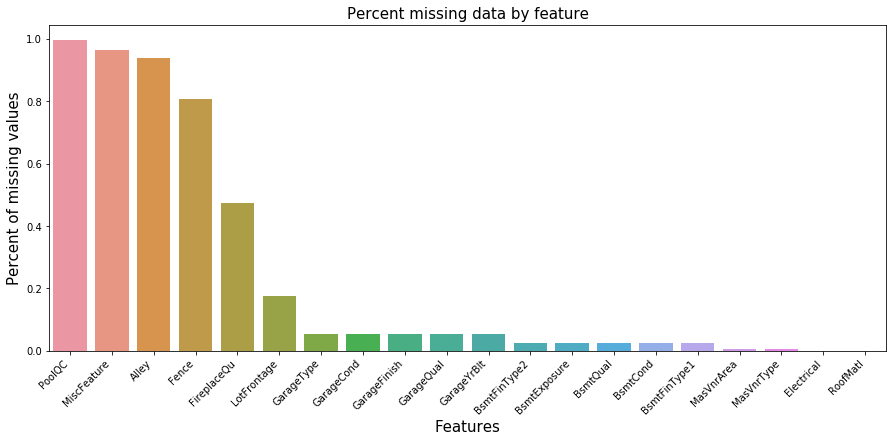

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [7]:
# plot percentage of missing data in train data set
total = dfTrain.isnull().sum().sort_values(ascending=False)
percent = (dfTrain.isnull().sum()/dfTrain.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total.head(20), percent.head(20)], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='45', ha="right")
sns.barplot(x=missing_data.index, y=missing_data.Percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()
missing_data.head(10)

From the initial exploration done above we got that we have 80 features, 43 are strings and 38 are numeric.

String features are all categorical, with at most 24 categories. Numeric features are almost all real numbers, with only two of them being integers.

We also got that a lot of data is missing. Especially 5 columns have a missing rate higher than 20% ('PoolQC', 'MiscFeature', 'Alley', 'Fence' and 'FireplaceQu'). From the documentation the missing values seems to be when the feature referred do not exist (for exemple the house does not have pool or fire place).

## 3. Data Analysis and Visualization

Make correlation analysis and visual plot of the relation between most important features and the target variable.

Check the presence of outliers.

### 3.1 Correlation

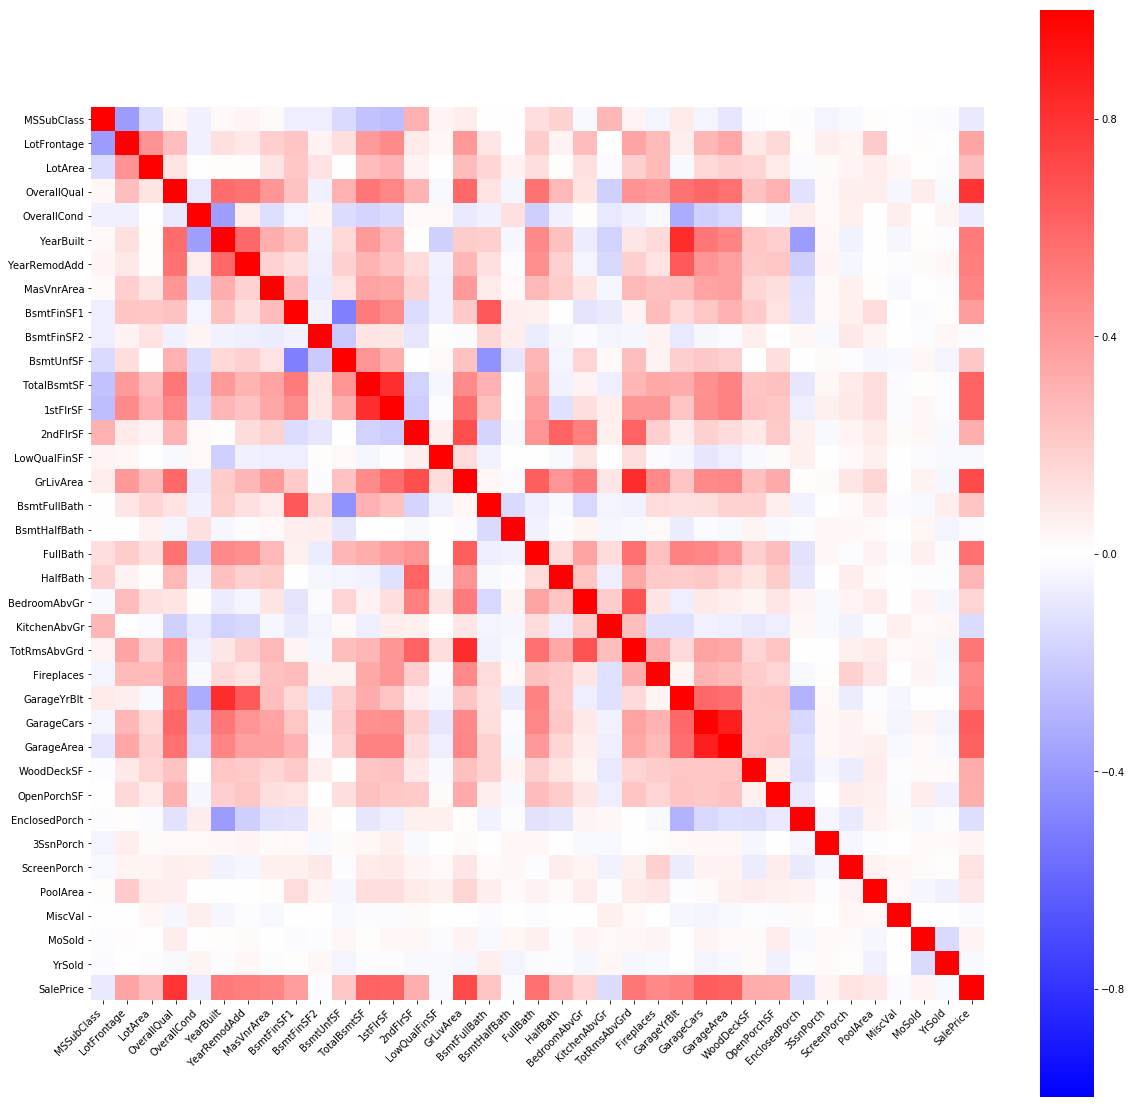

In [8]:
# plot heatmap with correlation between numeric features
dfNum = dfTrain.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,20))
sns.heatmap(data=dfNum.corr(), vmin=-1, vmax=1, cmap='bwr', square=True)
plt.xticks(rotation='45', ha="right")
plt.show()

In [9]:
# print correlation with SalePrice
dfNum.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

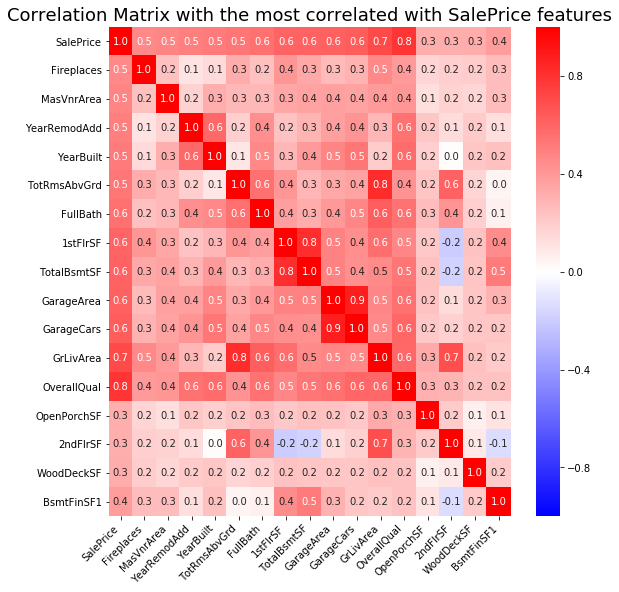

In [10]:
# correlation matrix containing only numeric features with higher correlation with SalePrice
main_features = ['SalePrice', 'Fireplaces', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 
              'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 
              'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'BsmtFinSF1']
target = ['SalePrice']
size = dfNum[main_features].shape[1]
plt.figure(figsize=(9,9))
sns.heatmap(data=dfNum[main_features].corr(), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt = ".1f")
plt.xticks(rotation='45', ha="right")
plt.title("Correlation Matrix with the most correlated with SalePrice features", fontsize=18)
plt.show()

### 3.2 Scatter Plots

Scatter plot of SalePrice with five of the most correlated features: OverallQual, GrLivArea, GarageCars, TotalBsmtSF 
and YearBuilt

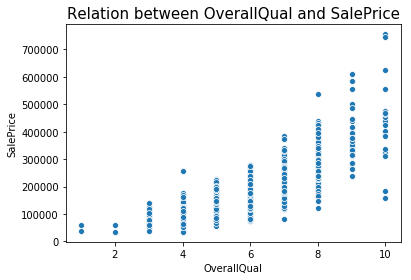

In [11]:
# plot of OverallQual x SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=dfTrain)
plt.title("Relation between OverallQual and SalePrice", fontsize=15)
plt.show()

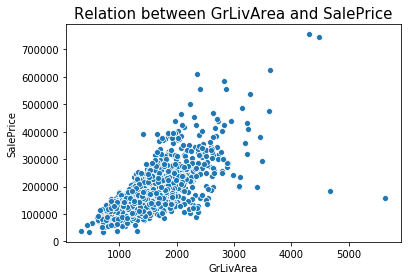

In [12]:
# plot of GrLivArea x SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=dfTrain)
plt.title("Relation between GrLivArea and SalePrice", fontsize=15)
plt.show()

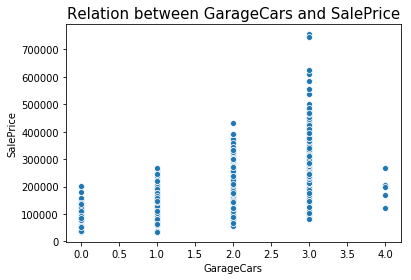

In [13]:
# plot of GarageCars x SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=dfTrain)
plt.title("Relation between GarageCars and SalePrice", fontsize=15)
plt.show()

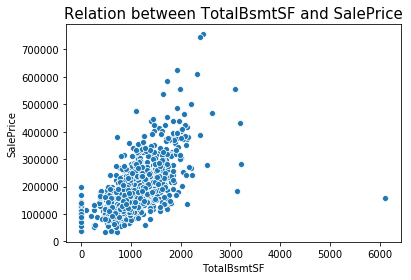

In [14]:
# plot of YearBuilt x SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=dfTrain)
plt.title("Relation between TotalBsmtSF and SalePrice", fontsize=15)
plt.show()

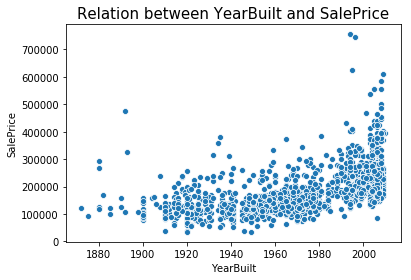

In [15]:
# plot of YearBuilt x SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=dfTrain)
plt.title("Relation between YearBuilt and SalePrice", fontsize=15)
plt.show()

### 3.2 Outliers

Check the distribution shape of the dependent and independent variables.


 mu = 180921.20 and sigma = 79415.29



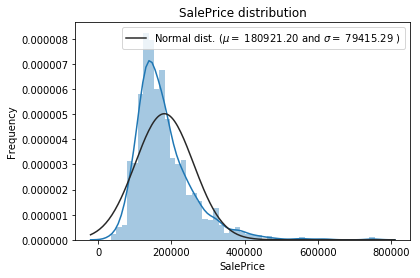

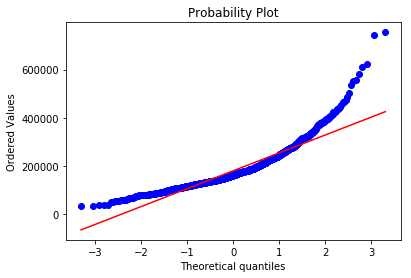

In [16]:
# plot SalePrice distribution
from scipy import stats

sns.distplot(dfTrain['SalePrice'] , fit=stats.norm);


# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(dfTrain['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot=plt)
plt.show()


From the figures we can see that it do not follow a normal distribution, wich is a desirable factor in a lot of models. Because of that we will use TransformedTargetRegressor and apply log(1+x) on this data when running the regression models.

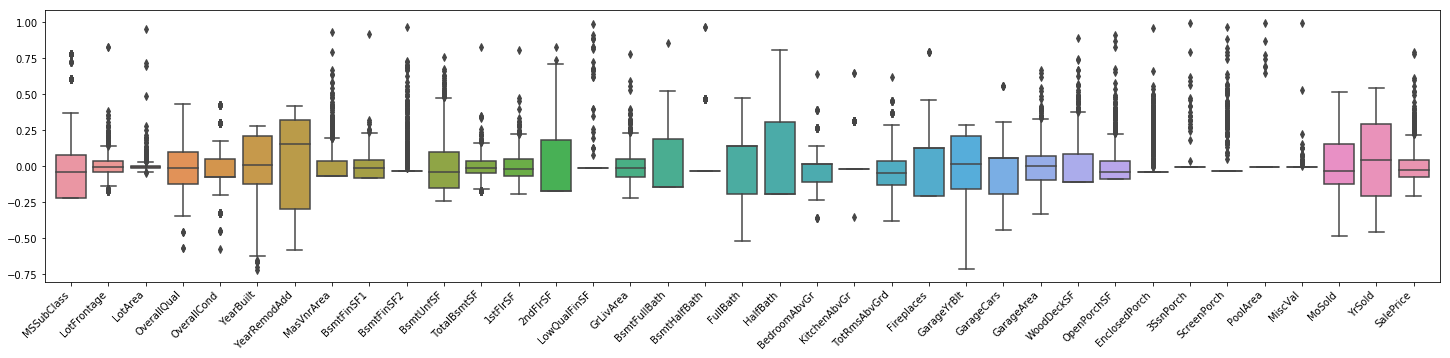

In [17]:
# explore presence of outliers
plt.figure(figsize=(25,5))
dfNorm = (dfNum - dfNum.mean()) / (dfNum.max() - dfNum.min())

sns.boxplot(data = dfNorm)
size = dfNorm.shape[1]
plt.xticks(np.linspace(0,size+1,size+2), dfNorm.columns.values, rotation=45, ha="right")
plt.xlim(-0.7,size-0.3)
plt.show()

Examine normalized distribution of values in the features. Columns with more dots means more values are beyond standard deviation and therefore have more outliers, or a more heavy tailed distribution.

Have a high rate of outliers: LotArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr,
EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal.

To deal with that in the cleaning stage we will apply boxcox1p in the most skewed distributions.

## 4. Clean and arrange data

Create new features, fill missing values and fix distribution skew.

As from the description the 5 columns with most missing data ('PoolQC', 'MiscFeature', 'Alley', 'Fence' and 'FireplaceQu') possibly mean that the house does not have the referred feature, we will fill them with 'None'.

In [18]:
# fill the five columns with most missing data with 'None'
for df in [dfTrain, dfTest]:
    df["PoolQC"] = df["PoolQC"].fillna("None")
    df["MiscFeature"] = df["MiscFeature"].fillna("MiscFeature")
    df["Alley"] = df["Alley"].fillna("None")
    df["Fence"] = df["Fence"].fillna("None")
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In a first aproximation we fill all numeric features missing values by the median and all the string features by the mode.

In [19]:
# fill numeric missing values by median and string missing values with mode
numeric_new = numeric.copy()
numeric_new.remove('SalePrice')
for df in [dfTrain, dfTest]:
    df.loc[:,numeric_new] = df.loc[:,numeric_new].fillna(df.loc[:,numeric_new].median())
    df.loc[:,string] = df.loc[:,string].fillna(df.loc[:,string].mode().to_dict('records')[0])

In [20]:
# create total area joining data from basement 1st floor and 2nd floor
for df in [dfTrain, dfTest]:
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [21]:
# apply boxcox1p in the most skewed features
from scipy.stats import skew
from scipy.special import boxcox1p

for df in [dfTrain, dfTest]:
    skewed_feats = df.loc[:,numeric_new].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness = skewness[abs(skewness) > 0.75]
    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        df.loc[:,feat] = boxcox1p(df.loc[:,feat], lam)

Checking the final test and train data frame

In [22]:
dfTrain.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.218681,5.891666,19.559847,2.256245,2.160447,14.137345,14.158967,3.268986,7.084893,1.051743,...,3.253621,1.038273,0.130728,0.622599,0.050873,0.402839,2.230573,14.195036,180921.195890,2567.048630
std,1.241991,0.581655,2.045888,0.268112,0.222422,0.047988,0.032550,4.128195,5.142205,2.995523,...,3.108401,2.586740,1.022477,2.134691,0.733617,2.150673,0.552307,0.002069,79442.502883,821.714421
min,3.858807,3.932510,12.878993,0.730463,0.730463,13.977122,14.103852,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.730463,14.192207,34900.000000,334.000000
25%,3.858807,5.684507,18.780508,2.055642,2.055642,14.110234,14.130899,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.055642,14.193765,129975.000000,2009.500000
50%,5.357203,5.942124,19.661860,2.259674,2.055642,14.140398,14.173451,0.000000,9.612911,0.000000,...,4.201461,0.000000,0.000000,0.000000,0.000000,0.000000,2.259674,14.195323,163000.000000,2474.000000
75%,5.968981,6.197221,20.472186,2.440268,2.259674,14.182841,14.189087,7.675996,11.193890,0.000000,...,5.914940,0.000000,0.000000,0.000000,0.000000,0.000000,2.602594,14.196881,214000.000000,3004.000000
max,7.990963,9.125735,35.391371,2.885846,2.750250,14.198437,14.198437,13.496904,17.692270,13.250499,...,10.501575,10.524981,10.312501,10.169007,11.289160,21.677435,3.128239,14.198437,755000.000000,11752.000000


In [23]:
print(dfTrain.info())
print(dfTest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
MSSubClass       1460 non-null float64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd 

## 5. Fitting and comparing Models

Here it is trained 7 models, all optimized and checked with cross validation score. We choose the model with best squared log error. The models trained here are:
* Linear Regression
* Lasso Regression
* ElasticNet Regression
* Kernel Ridge Regressor
* Random Forest Regressor
* KNN or k-Nearest Neighbors Regressor
* Gradient Boosting Regressor

In [24]:
# prepare data
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

target = ['SalePrice']
X = pd.get_dummies(dfTrain, columns=string, drop_first=True).drop(columns=target)
y = dfTrain[target]

In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1)
scores = cross_validate(lr, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_lr = round(scores['test_r2'].mean(), 3)
rmse_lr = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 2)
rmsle_lr = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)
print('R2:', r2_lr)
print('Root Mean Squared Error:', rmse_lr)
print('Root Mean Squared Log Error:', rmsle_lr)

R2: 0.789
Root Mean Squared Error: 37101.55
Root Mean Squared Log Error: 0.1641


In [26]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = make_pipeline(RobustScaler(), TransformedTargetRegressor(Lasso(alpha =0.0005),
                                                 func=np.log1p, inverse_func=np.expm1))
scores = cross_validate(lasso, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_lasso = round(scores['test_r2'].mean() , 3)
rmse_lasso = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 2)
rmsle_lasso = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)
print('R2:', r2_lasso)
print('Root Mean Squared Error:', rmse_lasso)
print('Root Mean Squared Log Error:', rmsle_lasso)

R2: 0.825
Root Mean Squared Error: 33721.6
Root Mean Squared Log Error: 0.1305


In [27]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

elNet = make_pipeline(RobustScaler(), TransformedTargetRegressor(ElasticNet(alpha=0.0005, l1_ratio=.9),
                                                 func=np.log1p, inverse_func=np.expm1))
scores = cross_validate(elNet, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_elNet = round(scores['test_r2'].mean() , 3)
rmse_elNet = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 2)
rmsle_elNet = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)
print('R2:', r2_elNet)
print('Root Mean Squared Error:', rmse_elNet)
print('Root Mean Squared Log Error:', rmsle_elNet)

R2: 0.827
Root Mean Squared Error: 33522.33
Root Mean Squared Log Error: 0.1305


In [28]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn = TransformedTargetRegressor(KNeighborsRegressor(n_neighbors=15), func=np.log1p, inverse_func=np.expm1)
scores = cross_validate(knn, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_knn = round(scores['test_r2'].mean() , 3)
rmse_knn = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 2)
rmsle_knn = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)
print('R2:', r2_knn)
print('Root Mean Squared Error:', rmse_knn)
print('Root Mean Squared Log Error:', rmsle_knn)

R2: 0.659
Root Mean Squared Error: 46214.12
Root Mean Squared Log Error: 0.2274


In [29]:
# KernelRidge Regressor
from sklearn.kernel_ridge import KernelRidge

krr = make_pipeline(RobustScaler(), 
                    TransformedTargetRegressor(KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
                                  func=np.log1p, inverse_func=np.expm1))
scores = cross_validate(krr, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_krr = round(scores['test_r2'].mean() , 3)
rmse_krr = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 2)
rmsle_krr = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)
print('R2:', r2_krr)
print('Root Mean Squared Error:', rmse_krr)
print('Root Mean Squared Log Error:', rmsle_krr)

R2: 0.825
Root Mean Squared Error: 33726.9
Root Mean Squared Log Error: 0.1294


In [30]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = TransformedTargetRegressor(RandomForestRegressor(n_estimators=400, max_depth=8),
                                func=np.log1p, inverse_func=np.expm1)
scores = cross_validate(rf, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_rf = round(scores['test_r2'].mean() , 3)
rmse_rf = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 4)
rmsle_rf = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)

print('R2:', r2_rf)
print('Root Mean Squared Error:', rmse_rf)
print('Root Mean Squared Log Error:', rmsle_rf)

R2: 0.851
Root Mean Squared Error: 30827.3296
Root Mean Squared Log Error: 0.1467


In [31]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gBoost = TransformedTargetRegressor(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                                              max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                              min_samples_split=10, loss='huber'),
                                    func=np.log1p, inverse_func=np.expm1)

scores = cross_validate(gBoost, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_squared_log_error'])
r2_gBoost = round(scores['test_r2'].mean() , 3)
rmse_gBoost = round(np.sqrt(-scores['test_neg_mean_squared_error'].mean()), 2)
rmsle_gBoost = round(np.sqrt(-scores['test_neg_mean_squared_log_error'].mean()), 4)
print('R2:', r2_gBoost)
print('Root Mean Squared Error:', rmse_gBoost)
print('Root Mean Squared Log Error:', rmsle_gBoost)

R2: 0.893
Root Mean Squared Error: 26326.16
Root Mean Squared Log Error: 0.1237


In [32]:
# Comparison of Models
models = pd.DataFrame({
    'Root Mean Squared Error': [rmse_lr, rmse_lasso, rmse_elNet, rmse_krr, rmse_gBoost, rmse_rf, rmse_knn],
    'R-squared': [r2_lr, r2_lasso, r2_elNet, r2_krr, r2_gBoost, r2_rf, r2_knn],
    'Root Mean Squared Log Error':
        [rmsle_lr, rmsle_lasso, rmsle_elNet, rmsle_krr, rmsle_gBoost, rmsle_rf, rmsle_knn]},
    index=['Linear Regression', 'Lasso', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting Regressor', 
              'Random Forest', 'KNN'])
models = models.sort_values(by='Root Mean Squared Log Error')

models

,R-squared,Root Mean Squared Error,Root Mean Squared Log Error
Gradient Boosting Regressor,0.893,26326.1600,0.1237
Kernel Ridge,0.825,33726.9000,0.1294
Lasso,0.825,33721.6000,0.1305
Elastic Net,0.827,33522.3300,0.1305
Random Forest,0.851,30827.3296,0.1467
Linear Regression,0.789,37101.5500,0.1641
KNN,0.659,46214.1200,0.2274


As Gradient Boosting Regressor was one of the best models (Root Mean Squared Log Error=0.12) it will be utilized in submission file.

Bellow we see the importance of each feature in Gradient Boosting Regressor, we will maintain only features with 
importance greater than 0.0001:

In [33]:
gBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                                              max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                              min_samples_split=10, loss='huber')

gBoost.fit(X, y)
dfFit = pd.DataFrame(gBoost.feature_importances_, X.columns, 
                     columns=['Coefficient'])
to_keep = dfFit[dfFit.Coefficient > 0.00005].index.values

print(dfFit.sort_values(by='Coefficient', ascending=False).head(15))
print("\n\nWill be maintained:\n", to_keep)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                  Coefficient
TotalSF              0.160245
GrLivArea            0.092393
OverallQual          0.063319
GarageArea           0.059944
GarageFinish_Unf     0.052472
TotalBsmtSF          0.047642
GarageCars           0.044867
ExterQual_Gd         0.041392
ExterQual_TA         0.039042
YearBuilt            0.034745
Fireplaces           0.024383
FullBath             0.023950
TotRmsAbvGrd         0.017489
1stFlrSF             0.016873
BsmtFinSF1           0.016615


Will be maintained:
 ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' 'ScreenPorch'
 'MoSold' 'YrSold' 'TotalSF' 'MSZoning_FV' 'MSZoning_RL' 'MSZoning_RM'
 'Alley_None' 'LotShap

## 6. Validating Model

Verify quality of the trained model (Gradient Boosting Regressor).

In [34]:
# fit model with train_test_split and verify model in dev data set 
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X[to_keep], y, random_state=123, test_size=0.2)
gBoost = TransformedTargetRegressor(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                                              max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                              min_samples_split=10, loss='huber'),
                                    func=np.log1p, inverse_func=np.expm1)

gBoost.fit(X_train, y_train)
y_pred = gBoost.predict(X_dev)

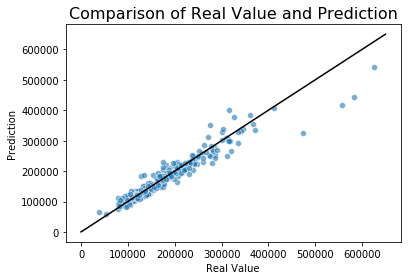

In [35]:
# scatter plot of real and prediction values
sns.scatterplot(x=y_dev.values.reshape(1,-1)[0], y=y_pred.reshape(1,-1)[0], sizes=4, alpha=0.6)
plt.plot(np.linspace(0,6.5e5), np.linspace(0,6.5e5), linewidth=1.5, c='black')
plt.ylabel('Prediction')
plt.xlabel('Real Value')
plt.title('Comparison of Real Value and Prediction', fontsize=16)
plt.show()

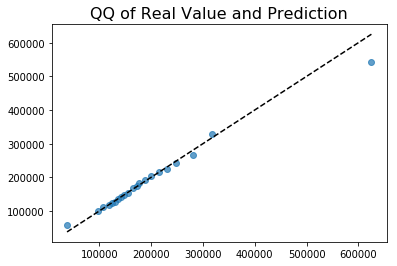

In [36]:
# quantile-quantile with y_dev and y_pred
percs = np.linspace(0,100,21)
qn_dev = np.percentile(y_dev, percs)
qn_pred = np.percentile(y_pred, percs)

plt.plot(qn_dev, qn_pred, ls="", marker="o", alpha=0.7)

x = np.linspace(np.min((qn_dev.min(),qn_pred.min())), np.max((qn_dev.max(),qn_pred.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("QQ of Real Value and Prediction", fontsize=16)

plt.show()

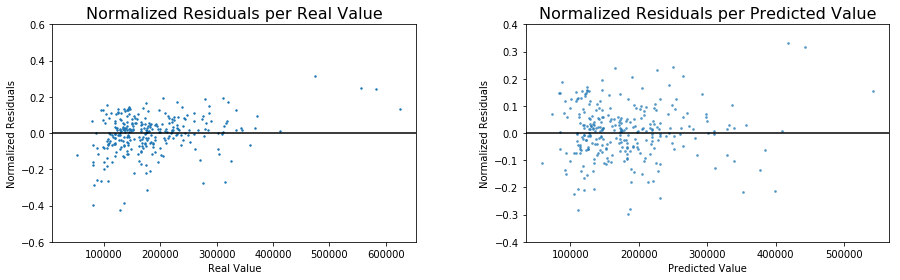

In [37]:
# plot residual
fig, axes= plt.subplots(nrows=1, ncols=2,figsize=(15,4))

plt.subplot(1,2,1)
plt.scatter(y_dev, (y_dev-y_pred)/y_dev, s=2)
plt.axhline(0, c='black')
plt.ylim([-0.6, 0.6])
plt.xlabel('Real Value')
plt.ylabel('Normalized Residuals')
plt.title("Normalized Residuals per Real Value", fontsize=16)

plt.subplot(122)
plt.scatter(y_pred, (y_dev-y_pred)/y_pred, s=3, alpha=0.6)
plt.axhline(0, c='black')
plt.ylim([-0.4, 0.4])
plt.xlabel('Predicted Value')
plt.ylabel('Normalized Residuals')
plt.title("Normalized Residuals per Predicted Value", fontsize=16)

plt.subplots_adjust(wspace=0.3)
plt.show()

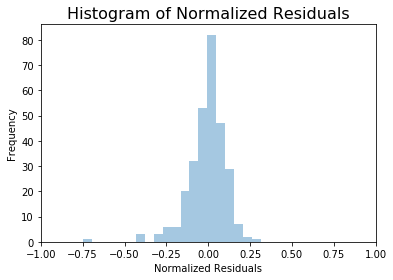

In [38]:
sns.distplot(((y_dev-y_pred)/y_dev).values.reshape(1,-1)[0], bins=20, kde = False)
plt.xlim([-1,1])
plt.xlabel('Normalized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Residuals', fontsize=16)
plt.show()

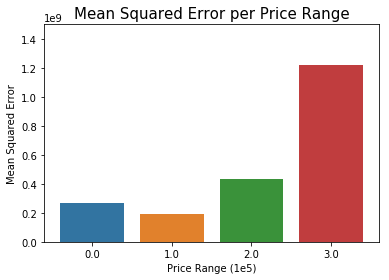

In [39]:
# plot mean squared error per price range (excluding houses with high SalePrice, which error is much bigger)
dfValidation = pd.DataFrame((y_dev-y_pred)**2)
dfValidation = dfValidation.rename(columns={'SalePrice': 'Normalized_Error'})
dfValidation = pd.merge(dfValidation, dfTrain, right_index=True, 
                        left_index=True, how='left')
dfValidation['SalePrice_category'] = dfValidation['SalePrice'] // 1e5
dfValidation['SalePrice_category'] = dfValidation['SalePrice_category'].astype('category')
dfGroupPrice = dfValidation.groupby('SalePrice_category').mean()

plt.figure()
sns.barplot(dfGroupPrice.index.values, dfGroupPrice.Normalized_Error)
plt.xlabel('Price Range (1e5)')
plt.ylabel('Mean Squared Error')
plt.xlim([-0.6,3.6])
plt.ylim([0, 1.5e9])
plt.xticks([0,1,2,3])
plt.title('Mean Squared Error per Price Range', fontsize=15)
plt.show()

From the figures above we can see that the model have a good fit, with small error and residual is reasonably well distributed.

We can see that some high SalePrice were not predicted corretly (value is smaller than real) and this greatly increase residual. Dealing with this could improve the model.

We also see that the model performs best for smaller values, as there are mode data on this category.

## 7. Creating Submission File

Create and save submission file. The file is saved in the data folder with the name 'house-prices_submission.csv'

In [40]:
gBoost = TransformedTargetRegressor(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                                              max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                                              min_samples_split=10, loss='huber'),
                                    func=np.log1p, inverse_func=np.expm1)

X_test = pd.get_dummies(dfTest, columns=string, drop_first=True)
to_keep_new = [el for el in to_keep if el in X_test.columns.values]

gBoost.fit(X[to_keep_new], y)
predictions = gBoost.predict(X_test[to_keep_new])

output = pd.DataFrame({'Id': dfTest.index.values, 'SalePrice': predictions.reshape(1,-1)[0]})
output.to_csv('data/house-prices_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
